In [1]:
pip install --upgrade numpy scipy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from tqdm import tqdm

# Data Loading

In [3]:
with open("data.csv", "r", encoding="utf-8") as f:
    content = f.read().replace(";", ",")

with open("data_convert", "w", encoding="utf-8") as f:
    content = f.write(content)

In [4]:
data = pd.read_csv('data_convert')

In [5]:
data1 = data.copy()

In [6]:
data1

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


# Preprocessing

### Checking for duplications

In [7]:
data1.duplicated().sum()

np.int64(0)

### Unique data types

In [8]:
data1.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

### Checking missing values

In [9]:
for column in data.columns:
    nu = data[column].isnull().sum()
    na = data[column].isna().sum()
    #print(f'Number of Null values: {data[column].isnull().sum()}')
    #print(f'Number of N/A values: {data[column].isna().sum()}')
    if nu > 0 or na > 0:
        if nu > 0:
            print(f'The column {column} has {nu} null values')
        if na > 0:
            print(f'The column {column} has {na} n/a values')

### Encoding 'Target' column

In [10]:
data1['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [11]:
def convert(dt):
    if dt == 'Dropout' or dt == 'Enroll':
        return 0
    return 1
data1['Target'] = data1['Target'].apply(convert)

### Normalization

In [12]:
def z_score_scaling(df, target_col): 
    for col in df.select_dtypes(include=['float64']).columns: 
        if col != target_col: 
            mean_val = df[col].mean() 
            std_val = df[col].std() 
            df[col] = (df[col] - mean_val) / std_val 
        return df 
data1 = z_score_scaling(data1, target_col="Target")

### Encoding 'Course' column

In [13]:
data1['Course'].unique() 

array([ 171, 9254, 9070, 9773, 8014, 9991, 9500, 9238, 9670, 9853, 9085,
       9130, 9556, 9147, 9003,   33, 9119])

In [14]:
data1['Course']

0        171
1       9254
2       9070
3       9773
4       8014
        ... 
4419    9773
4420    9773
4421    9500
4422    9147
4423    9773
Name: Course, Length: 4424, dtype: int64

In [15]:
unique_courses = list(data['Course'].unique())
mapping = {course: idx for idx, course in enumerate(unique_courses)}
data1['Course'] = data1['Course'].map(mapping)

In [16]:
data1.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,0,1,1,-0.804750,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,1,1,1,2.076585,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,2,1,1,-0.804750,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,3,1,1,-0.804750,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,4,0,1,-2.472892,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


# Feature Engineering

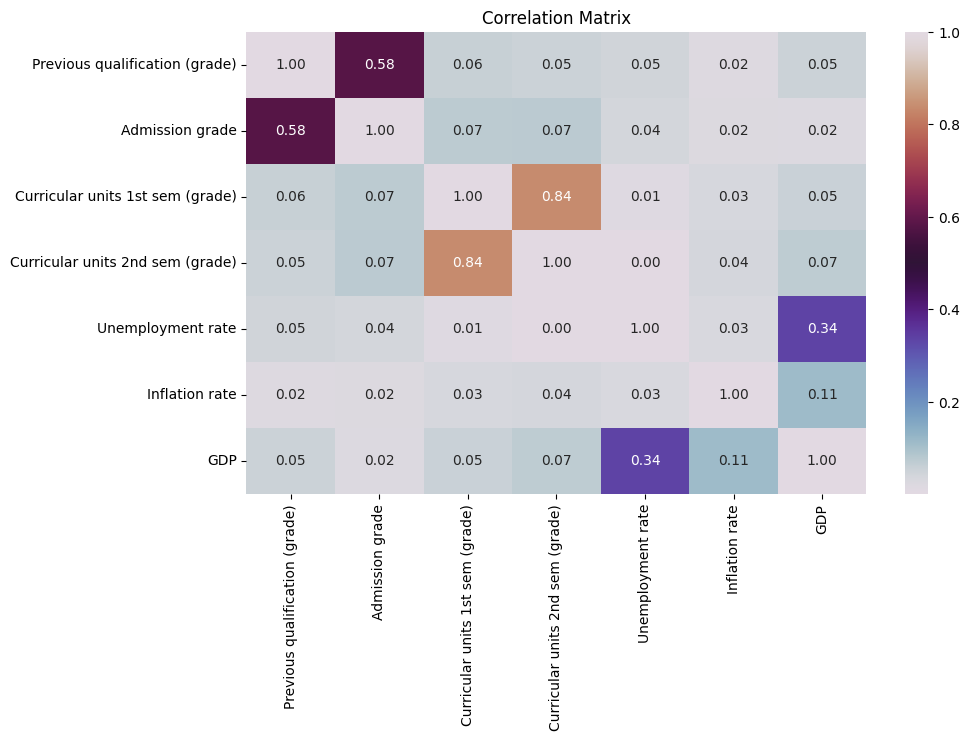

In [17]:
import seaborn as sns

continuous_data = data1.select_dtypes(include=['float64'])
corr_matrix = continuous_data.corr().abs()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='twilight', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [18]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
drop = [column for column in upper.columns if any(upper[column] >= 0.8)]
data1 = data1.drop(columns=drop)

# Model

In [19]:
class LogisticRegression:
    def __init__(self, epoch: int, lr: float):
        self.epoch = epoch
        self.lr = lr
        self.weights = None
        self.losses = []
        self.metrics = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))  
    
    def loss_function(self, y, y_hat):
        epsilon = 1e-6
        return -np.mean(y * np.log(y_hat + epsilon) + (1 - y) * np.log(1 - y_hat + epsilon))
    
    def accuracy(self, y, y_hat):
        return np.mean(1 - np.abs(y - y_hat))
    
    def fit(self, X, y):
        n = X.shape[0]
        d = X.shape[1]
        self.weights = np.zeros((d, 1))
         
        with tqdm(range(self.epoch)) as pb:
            for e in pb:
                pb.set_description(f"Epoch {e+1}/{self.epoch}")
                y_hat = self.predict(X)

                d_dw = 1/n * np.matmul(X.T, y_hat - y)
                self.weights -= self.lr * d_dw

                loss = self.loss_function(y, y_hat)
                acc = self.accuracy(y, y_hat) 
                pb.set_postfix({
                    "Loss": loss,
                    "Accuracy": acc
                })
                self.losses.append(loss)
                self.metrics.append(acc)

    def predict(self, X):
        return self.sigmoid(X @ self.weights)

In [20]:
X = data1.iloc[:, :].drop(columns='Target')
y = data1.iloc[:, 35].to_numpy().reshape(-1, 1)

In [21]:
model = LogisticRegression(epoch=2000, lr=0.0002)
model.fit(X, y)

Epoch 2000/2000: 100%|██████████| 2000/2000 [00:12<00:00, 163.78it/s, Loss=0.429, Accuracy=0.707]


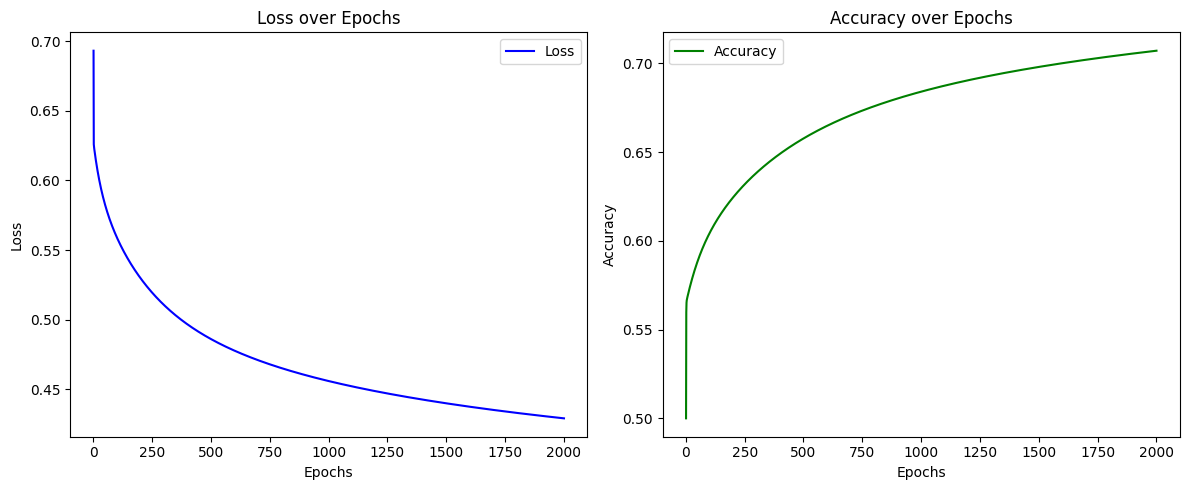

In [22]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(range(1, model.epoch + 1), model.losses, label='Loss', color='b')
axs[0].set_title('Loss over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(range(1, model.epoch + 1), model.metrics, label='Accuracy', color='g')
axs[1].set_title('Accuracy over Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()